## Jupyter notebook to describe the Assignment for the Programming in Data Analysis subject

A) Overall purpose of the package: Random values to create a BitGenerator by Generators
ref: numpy.org->BitGenerators: (https://numpy.org/doc/stable/reference/random/bit_generators/index.html)
ref : machinelearningmastery.com (https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

In [1]:
from numpy.random import PCG64, SeedSequence, seed, Generator, MT19937, default_rng


bg = PCG64(12345678903141592653589793)

# Get the user's seed somehow, maybe through `argparse`.
# If the user did not provide a seed, it should return `None`.

#seed = get_user_seed()


print('Seed = ', seed())# no seed given, so output should be none   
ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(2))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

ss = SeedSequence(seed(1))
print('seed = {}'.format(ss.entropy))
bg = PCG64(ss)

## Generator method uses PCG 

rg = Generator(bg)
mt = Generator(PCG64())

# In case we want to generate several random values using PCG64

rg = [Generator(PCG64(s)) for s in ss.spawn(10)] #Generate 10 entropy values ussing the last ss seed defined above

print('Using and modifying Spawn value')
print('Length of the entropy values created with ss seed defined:', len(rg))

# if we the spawn number is changed to 8, we are going to create 8 entorpy values instead:

rg = [Generator(PCG64(s)) for s in ss.spawn(8)]

print('Length of the entropy values created with ss seed defined:', len(rg))

Seed =  None
seed = 143468373250244157748278774061667505755
seed = 36212070138593700374141958424447878500
seed = 216900257519688439513814949640281466401
Using and modifying Spawn value
Length of the entropy values created with ss seed defined: 10
Length of the entropy values created with ss seed defined: 8


## A.1) Comparation the old method default_rng with new Generator mehtod, by analysing with plots and absolute statistics


#### references: 
[3] matplotlib.pyplot.hist (https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html)

[4] matplotlib.pyplot.scatter(https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html)

default_rng 10 first list numbers:  [0.8349776293430956, 0.6405339489100218, 0.1559360871758878, 0.26232867630385437, 0.14230602483074783, 0.4444623418000445, 0.27462328739437314, 0.49544681637234456, 0.7196274230500473, 0.38892680841624716]
Generator list 10 first list numbers:  [0.7334441981401882, 0.4225746511947299, 0.9424436924773201, 0.012204575545864071, 0.5217936161123033, 0.2066084036229594, 0.2460126654870053, 0.48999529429013866, 0.8619775261885192, 0.9312376118020413]
______________________________________________________________
-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods
-DEFAULT_RNG
Maximum value of default_rng method:  0.9998621818280222
Mean value of default_rng method:  0.4932701042999441
-Generator:
Maximum value of Generator method:  0.9996636492413506
Mean value of Generator method:  0.5127488998965921


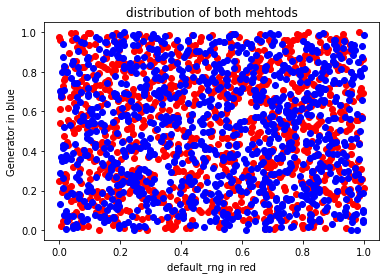

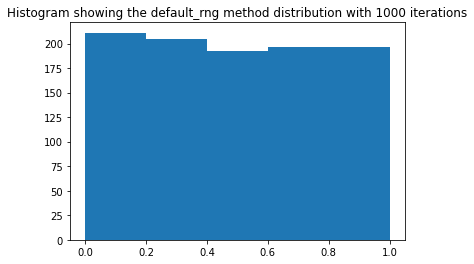

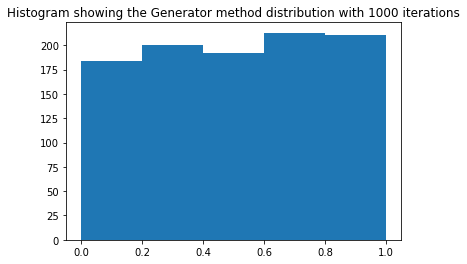

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Generate 1000 random numbers per method
ls = [default_rng(s).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('default_rng 10 first list numbers: ',[ls[i] for i in range(0,10)])

ls2 = [Generator(PCG64(s)).random() for s in ss.spawn(1000)] #Create 100 random numbers and see the distribution with the old method
print('Generator list 10 first list numbers: ',[ls2[i] for i in range(0,10)])




x = ls #np.random.rand(N)
y = ls2 #np.random.rand(N)

plt.scatter(x, y, color='r')
plt.scatter(y, x, color='b')
print('______________________________________________________________')
print('-STATS AND PLOTS SHOWING DISTRIBUTION BY USING default_rng AND Generator(MT19937()) methods')
print('-DEFAULT_RNG')
print('Maximum value of default_rng method: ',max(x))
print('Mean value of default_rng method: ',np.mean(x))
print('-Generator:')
print('Maximum value of Generator method: ',max(y))
print('Mean value of Generator method: ',np.mean(y))

plt.xlabel('default_rng in red')
plt.ylabel('Generator in blue');
plt.title('distribution of both mehtods')
plt.show()

a = np.array(x) 
plt.hist(a, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the default_rng method distribution with 1000 iterations") 
plt.show()

b = np.array(y) 
plt.hist(b, bins = [0,0.2,0.4,0.6,0.8,1.0]) 

plt.title("Histogram showing the Generator method distribution with 1000 iterations") 
plt.show()

## B) Explanation of simple random data and permutations

PLOTS REGARDING SIMPLE RANDOM VARIABLES IN ORDER TO SHED LIGHT ABOUT THE DIFFERENCE BETWEEN THEM
numpy.random.rand() definition


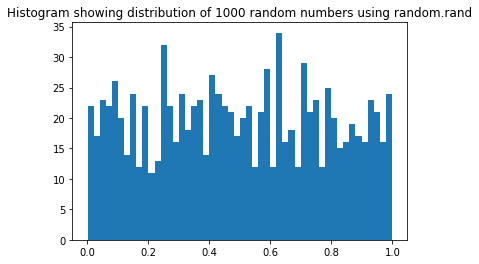

numpy.random.randn() definition


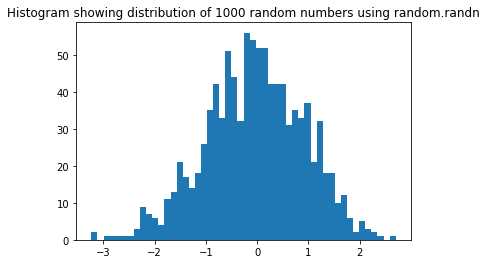

numpy.random.randint() definition


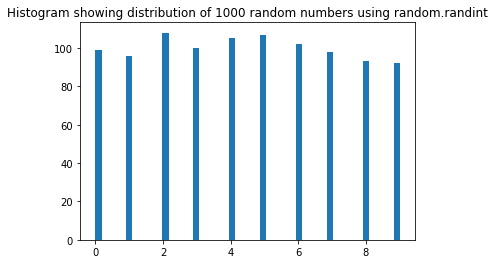

numpy.random.random_integers() definition


<ipython-input-23-cc00aa93a54c>:33: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  d = np.array(np.random.random_integers(0,10, size=1000))


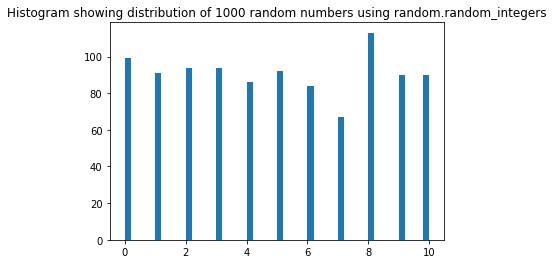

numpy.random.random_sample() definition
[0.87399015 0.08752832 0.11562057]


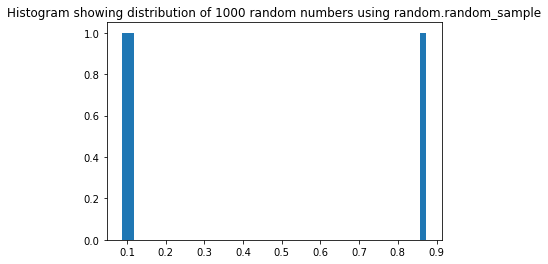

numpy.random.random() definition
[0.75840876 0.20557861 0.04820879]


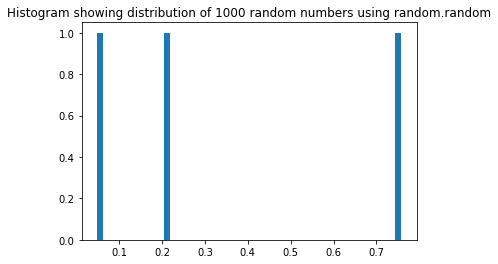

numpy.random.ranf() definition
[0.09430793 0.19966861 0.57045117]


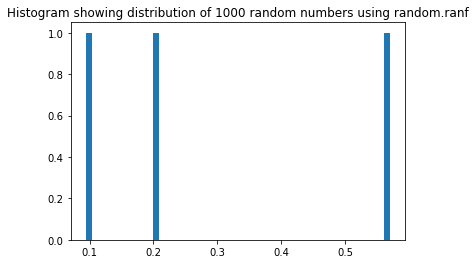

numpy.random.sample() definition
[0.74553724 0.67235158 0.54736885]


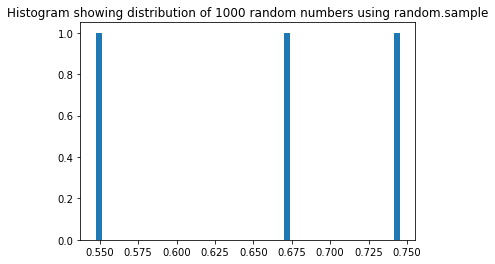

numpy.random.choice() definition
[1 1 0]


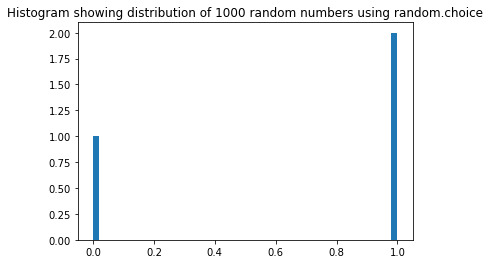

numpy.random.bytes() definition
string of random bytes defined in the function:  b'\x0c\xb8\xad&*'


In [23]:
print('PLOTS REGARDING SIMPLE RANDOM VARIABLES IN ORDER TO SHED LIGHT ABOUT THE DIFFERENCE BETWEEN THEM')
# numpy.random.rand()
print('numpy.random.rand() definition')
a = np.array(np.random.rand(1000))

plt.hist(a, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.rand") 
plt.show()

# np.random.randn()
print('numpy.random.randn() definition')
b = np.array(np.random.randn(1000)) 
#print(max(b))
#print(min(b))
#print(b)
plt.hist(b, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randn") 
plt.show()

# numpy.random.randint()
print('numpy.random.randint() definition')
c = np.array(np.random.randint(0,10, size=1000))

plt.hist(c, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.randint") 
plt.show()

# numpy.random.random_integers()
print('numpy.random.random_integers() definition')
d = np.array(np.random.random_integers(0,10, size=1000))

plt.hist(d, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random_integers") 
plt.show()

# numpy.random.random_sample()
print('numpy.random.random_sample() definition')
e = np.array(np.random.random_sample(3)) # By modifying the number within the sample we get the total numbers where we are going to get the continuous uniform
print(e)
plt.hist(e, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random_sample") 
plt.show()

# numpy.random.random()
print('numpy.random.random() definition')
f = np.array(np.random.random(3)) # 
print(f)
plt.hist(f, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.random") 
plt.show()

# numpy.random.ranf()
print('numpy.random.ranf() definition')
g = np.array(np.random.ranf(3)) # 
print(g)
plt.hist(g, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.ranf") 
plt.show()

# numpy.random.sample()
print('numpy.random.sample() definition')
h = np.array(np.random.sample(3)) # 
print(h)
plt.hist(h, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.sample") 
plt.show()

# numpy.random.choice()
print('numpy.random.choice() definition')
i = np.array(np.random.choice(5,3)) # 
print(i)
plt.hist(i, bins = 50) 

plt.title("Histogram showing distribution of 1000 random numbers using random.choice") 
plt.show()

# numpy.random.bytes()
print('numpy.random.bytes() definition')
j = np.array(np.random.bytes(5)) # 
print('string of random bytes defined in the function: ',j)
